## Jeremyas Cornelis Abigail Wihardjon
## A11.2020.12415

DatasetL

### Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus
import matplotlib.image as mpimg

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from  io import StringIO

### Load Dataset

In [2]:
dataset = pd.read_csv("breastcancer.csv", header=None)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
dataset.shape

(569, 32)

Memberi penamaan kolom-kolom pada dataset

In [4]:
dataset.columns = ['id', 'diagnosis', 'radius_mean', 
                   'texture_mean', 'perimeter_mean', 
                   'area_mean', 'smoothness_mean', 'compactness_mean', 
                   'concavity_mean', 'concave points_mean', 'symmetry_mean',
                   'fractal_dimension_mean', 'radius_se', 'texture_se',
                   'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
                   'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se',
                   'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst',
                   'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

In [5]:
dataset.to_csv('breastcancer_with_header.csv', index=False)

In [8]:
dataset = pd.read_csv("breastcancer_with_header.csv")
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [48]:
dataset.shape

(569, 31)

### Data Exploratory

In [9]:
dataset.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [10]:
dataset.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [11]:
dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [12]:
# replace column diagnosis from string to numeric values

dataset['diagnosis'].replace({'M': 1, 'B': 0}, inplace=True)

In [13]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
diagnosis_counts = dataset['diagnosis'].value_counts()

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

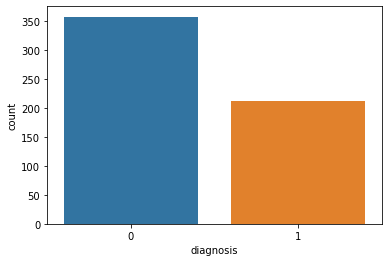

In [15]:
sns.countplot(data=dataset, x='diagnosis')

### Train Test Split

In [16]:
# hapus kolom "Id"

dataset = dataset.drop(labels="id", axis=1)

In [17]:
from sklearn.model_selection import train_test_split

X = dataset.drop(['diagnosis'], axis=1).values
y = dataset['diagnosis']

In [18]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [19]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
X_train.shape, X_test.shape

((455, 30), (114, 30))

### Build Model Decision Tree Classifier with Criterion Gini Index

In [22]:
# change dataframe to array numpy

dataset = dataset.to_numpy()

In [23]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

**Evaluate Model**

In [24]:
y_pred_gini_train = clf_gini.predict(X_train)
y_pred_gini_test = clf_gini.predict(X_test)

In [25]:
print('Model accuracy (train) score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_train, y_pred_gini_train)))
print('Model accuracy (test) score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini_test)))

Model accuracy (train) score with criterion gini index: 0.9714
Model accuracy (test) score with criterion gini index: 0.8947


**Generate Classification Report**

In [26]:
print(classification_report(y_test, y_pred_gini_test))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92        75
           1       0.89      0.79      0.84        39

    accuracy                           0.89       114
   macro avg       0.89      0.87      0.88       114
weighted avg       0.89      0.89      0.89       114



### Build Model Decision Tree Classifier with Criterion Entropy

In [27]:
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

**Evaluate Model**

In [28]:
y_pred_entropy_train = clf_entropy.predict(X_train)
y_pred_entropy_test = clf_entropy.predict(X_test)

In [29]:
print('Model accuracy (train) score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_train, y_pred_entropy_train)))
print('Model accuracy (test) score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_entropy_test)))

Model accuracy (train) score with criterion entropy: 0.9648
Model accuracy (test) score with criterion entropy: 0.9123


**Generate Classification Report**

In [30]:
print(classification_report(y_test, y_pred_entropy_test))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        75
           1       0.87      0.87      0.87        39

    accuracy                           0.91       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.91      0.91      0.91       114



### Hyperparameter

In [31]:

hyperparameters = {
    "max_depth": [2, 5, 6],
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "min_samples_split": [2, 5, 8]
}

model = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid = hyperparameters,
    cv = 5
)

model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 6], 'min_samples_split': [2, 5, 8],
                         'splitter': ['best', 'random']})

In [32]:
print("Hyperparameters Terbaik:", model.best_params_)
print("Score Terbaik:", model.best_score_) 

Hyperparameters Terbaik: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 5, 'splitter': 'random'}
Score Terbaik: 0.945054945054945


In [33]:
clf_best = model.best_estimator_
clf_best

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=5,
                       random_state=42, splitter='random')

**Evaluate best model**

In [34]:
y_pred_train = clf_best.predict(X_train)
y_pred_test = clf_best.predict(X_test)

In [49]:
print('Model accuracy (train) score with best model: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
print('Model accuracy (test) score with best model: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy (train) score with best model: 0.9648
Model accuracy (test) score with best model: 0.9035


**Generate Classification Report**

In [36]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93        75
           1       0.87      0.85      0.86        39

    accuracy                           0.90       114
   macro avg       0.89      0.89      0.89       114
weighted avg       0.90      0.90      0.90       114



### Another information

In [38]:
df = pd.read_csv("breastcancer_with_header.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [39]:
# hapus kolom "Id"

df = df.drop(labels="id", axis=1)

In [40]:
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

In [41]:
feature_names = X.columns
feature_names

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [42]:
feature_importance = pd.DataFrame(clf_best.feature_importances_, index = feature_names).sort_values(0, ascending=False)
feature_importance

,0
concave points_mean,0.692067
area_worst,0.072064
radius_worst,0.055864
concavity_worst,0.049967
concavity_se,0.030632
texture_mean,0.030444
compactness_worst,0.015994
area_mean,0.015377
compactness_se,0.011007
symmetry_se,0.010901


In [43]:
class_names = pd.DataFrame(clf_best.classes_)
class_names

,0
0,0
1,1


In [44]:
features = list(feature_importance[feature_importance[0]>0].index)
features

['concave points_mean',
 'area_worst',
 'radius_worst',
 'concavity_worst',
 'concavity_se',
 'texture_mean',
 'compactness_worst',
 'area_mean',
 'compactness_se',
 'symmetry_se',
 'smoothness_mean',
 'radius_se']

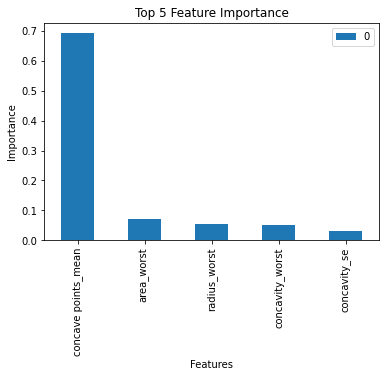

In [45]:
feature_importance = feature_importance[:5]
feature_importance.plot(kind='bar')

plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 5 Feature Importance')

plt.show()

In [47]:
dot_data = StringIO()
filename = "visualize-breastCancer-DT.png"
out = tree.export_graphviz(clf_best, feature_names=feature_names, out_file=dot_data,
                           filled=True, special_characters=True, rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(300, 400))
plt.imshow(img,interpolation='nearest')

## Kesimpulan
1. Data yang diberikan bisa dibilang cukup besar yaitu 569 data
2. Tidak ada data null
3. Variabel Independen sebanyak 30 variabel
4. Variabel Dependen adalah diagnosis dimana terbagi menjadi 2 kategori yaitu: 
    * M = Malignant (Ganas)
    * B = Benign (Jinak)
5. Pembagian data training dan data testing yang saya lakukan adalah 80 / 20, dimana 80% adalah data training dan 20% adalah data testing
6. Skor Decision Tree sebelum hyperparameter:
    * Dengan Gini Index: 0.8947
    * Dengan Entropy: 0.9123
7. Skor Akurasi setelah dilakukan hyperparameters dengan ketentuan:
    * Criterion = Entropy
    * Max depth = 5
    dengan **skor akurasi sebesar 0.9035**
8. Dalam pemodelan Decision Tree tersebut, terdapat 5 fitur yang paling penting yaitu:
    * concave points mean
    * area worst
    * radius worst
    * concavity worst
    * concavity se

**Sekian & Terimakasih**